In [1]:
import dhlab as dh
import dhlab.api.dhlab_api as api
import pandas as pd

In [2]:
tot = api.totals(200000)

In [3]:
def coll_periods(doc=None, fy=1900, ty = 2020, period = 10, word=None, before=10, after=10, ref=None, corpus_size=5000):
    colls_raw = []
    for year in range(fy, ty, period):
        print(year)
        coll = api.urn_collocation(
            urns = list(dh.Corpus(doctype=doc, fulltext = word, from_year= year, to_year = year + period, limit = corpus_size).corpus.urn),
            word=word,
            before=before, 
            after=after,         
        )
        if ref is not None:
            ref = ref/ref.sum()
            teller = coll["counts"]/coll["counts"].sum()
            coll[str(year)] = teller/ref
        #coll.columns=[str(year)]
        colls_raw.append(coll[[str(year)]])
    colls = pd.concat(colls_raw, axis=1)
    return colls

In [4]:
a = coll_periods(doc="digavis",
            fy=1970, ty=2020,period=5, word= 'oljeutvinning', ref=tot.freq)

1970
1975


/home/larsj/miniconda3/lib/python3.11/site-packages/dhlab/api/dhlab_api.py:715: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  return pd.read_json(StringIO(r.json()))
/home/larsj/miniconda3/lib/python3.11/site-packages/dhlab/api/dhlab_api.py:715: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  return pd.read_json(StringIO(r.json()))
/home/larsj/miniconda3/lib/python3.11/site-packages/dhlab/api/dhlab_api.py:715: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing stri

1980
1985
1990
1995
2000
2005
2010
2015


In [5]:
c = coll_periods(doc="digavis",
            fy=1970, ty=2020,period=5, word= 'miljøvern', ref=tot.freq)

1970
1975
1980
1985
1990
1995
2000
2005
2010
2015


In [6]:
vann = coll_periods(doc="digavis",
            fy=1970, ty=2020,period=5, word= 'vannkraft', ref=tot.freq)

1970
1975
1980
1985
1990
1995
2000
2005
2010
2015


In [7]:
b = coll_periods(doc="digavis",
            fy=1970, ty=2020,period=15, word= 'oljeeventyret', ref=tot.freq)

1970
1985
2000
2015


In [8]:
bc = coll_periods(doc="digavis",
            fy=1970, ty=2020,period=15, word= 'miljøvern', ref=tot.freq)

1970
1985
2000
2015


In [9]:
a.loc[[x for x in "oljeeventyret klima klimaendringer miljø miljøvern".split() if x in a.index]].fillna(0).sort_values(by=a.columns[0], ascending=False).head(20).style.format(precision=0).background_gradient(axis = 1)

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
oljeeventyret,267,31,39,0,0,61,87,371,0,86
miljøvern,6,48,0,66,180,61,29,30,15,15
klima,3,1,4,0,0,1,2,8,24,28
miljø,0,2,2,3,13,16,7,11,9,7
klimaendringer,0,0,0,0,0,0,36,83,241,71


In [10]:
vann

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
foredlende,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
forbrukende,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
driftsåret,13.168695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Willoch,2.378309,13.578204,11.43078,NaN,1.21233,2.60051,1.389829,7.03508,1.263637,NaN
kullfyrt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
hyllevare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.496204
fornybarnasjon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SGCM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

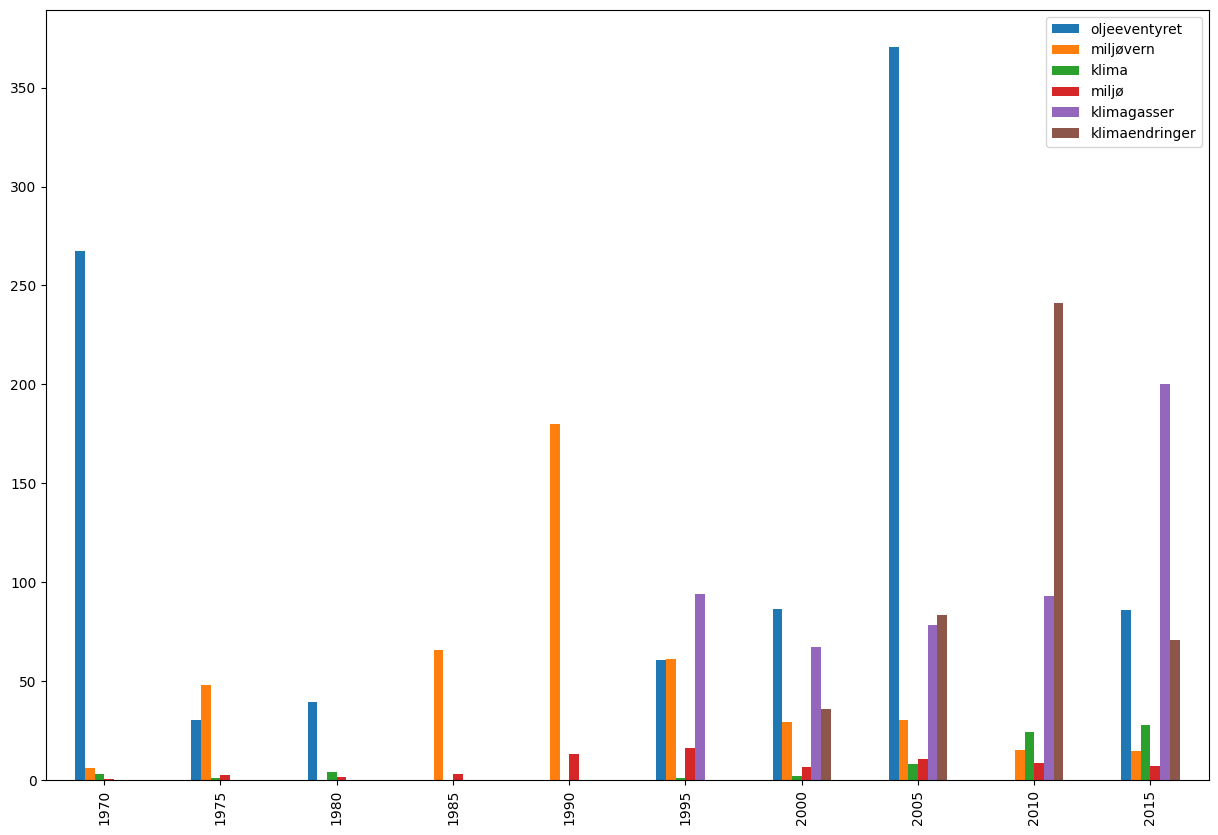

In [11]:
a.loc[[x for x in "oljeeventyret klima klimaendringer klimagasser miljø miljøvern".split() if x in a.index]].fillna(0).sort_values(by=a.columns[0], ascending=False).transpose().plot(kind='bar')


In [13]:
c.loc[[x for x in "oljeeventyret vannkraft klima klimakrisen klimaendringer olje".split() if x in c.index]].fillna(0).sort_values(by=a.columns[0], ascending=False).head(20).style.format(precision=0).background_gradient(axis = 1)

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
vannkraft,35,10,11,14,20,14,10,5,11,5
olje,2,3,8,2,3,1,4,8,14,4
klima,0,0,2,0,0,1,2,35,89,76
klimakrisen,0,0,0,0,0,0,0,0,106,455
klimaendringer,0,0,0,0,0,17,9,77,106,138


In [14]:
b.loc[[x for x in "oljeeventyret klima klimakrisen miljø miljøvern".split() if x in b.index]].fillna(0).sort_values(by=a.columns[0], ascending=False).head(20).style.format(precision=0).background_gradient(axis = 1)

,1970,1985,2000,2015
oljeeventyret,2204,1180,766,1520
miljø,6,2,2,0
klima,1,1,2,3
klimakrisen,0,0,0,92


In [15]:
klimakrise = dh.Ngram(["klimakrise"], from_year = 1960, to_year =2019, doctype='avis' ).frame

In [16]:
klimaendringer = dh.Ngram(["klimaendringer"], from_year = 1960, to_year =2018, doctype='avis' ).frame

In [17]:
klim = dh.Ngram(["klima"], from_year = 1960, to_year =2018, doctype='avis' ).frame

<Axes: >

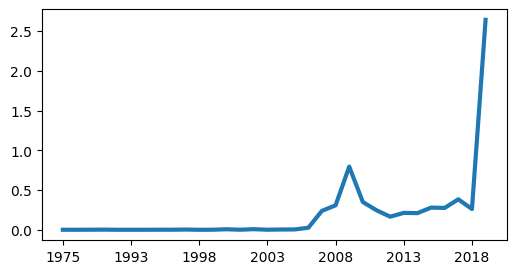

In [18]:
(klimakrise*10000).plot(figsize=(6,3), lw=3, legend=None)

<Axes: >

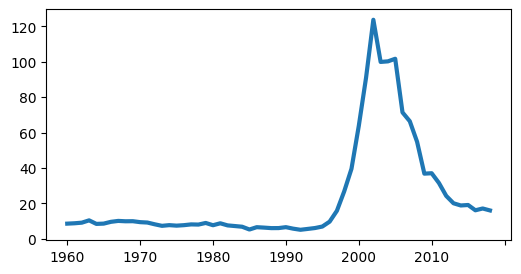

In [19]:
(klim*10000).plot(figsize=(6,3), lw=3, legend=None)

In [20]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

<Axes: title={'center': 'Oljeeventyret'}>

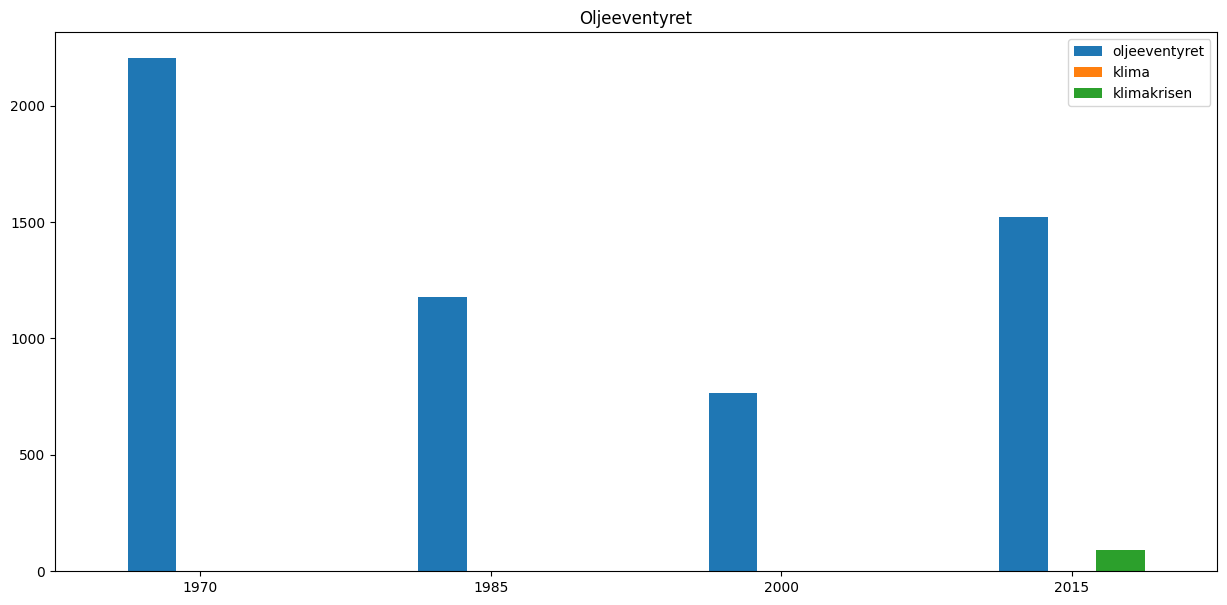

In [21]:
b.loc[[x for x in "oljeeventyret klima klimakrisen miljøvern".split() if x in b.index]].transpose().plot(kind="bar",figsize=(15,7),title="Oljeeventyret", rot=0)

<Axes: title={'center': 'Miljøvern'}>

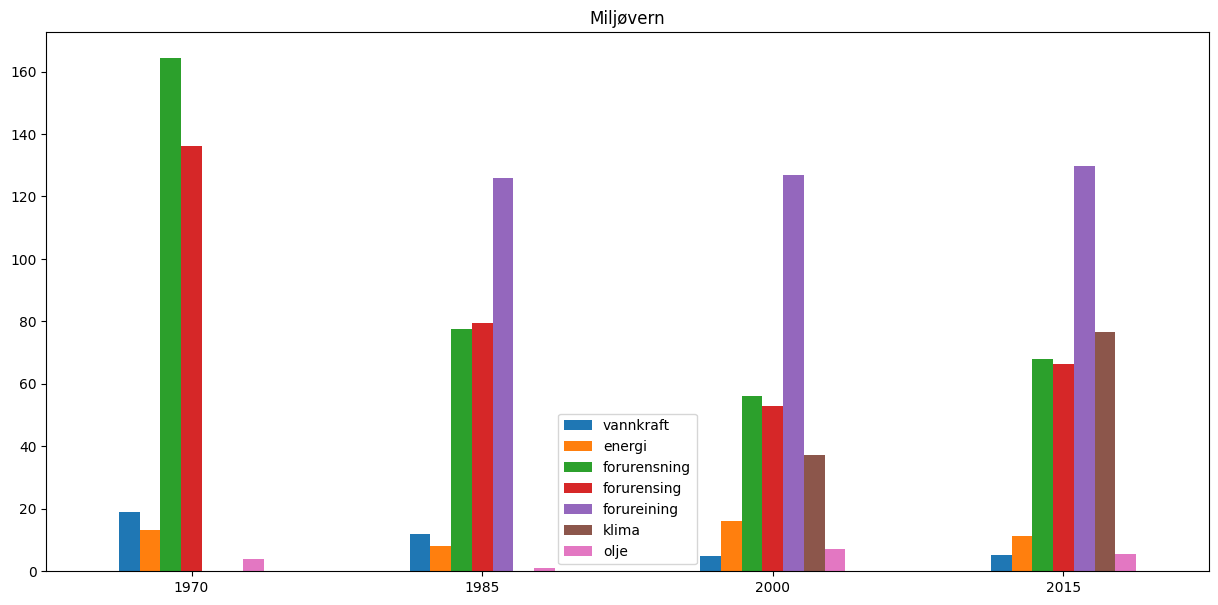

In [23]:
bc.loc[[x for x in "vannkraft energi forurensning forurensing forureining klima olje".split() if x in bc.index]].transpose().plot(kind="bar",figsize=(15,7),title="Miljøvern", rot=0)

<Axes: title={'center': 'Vannkraft'}>

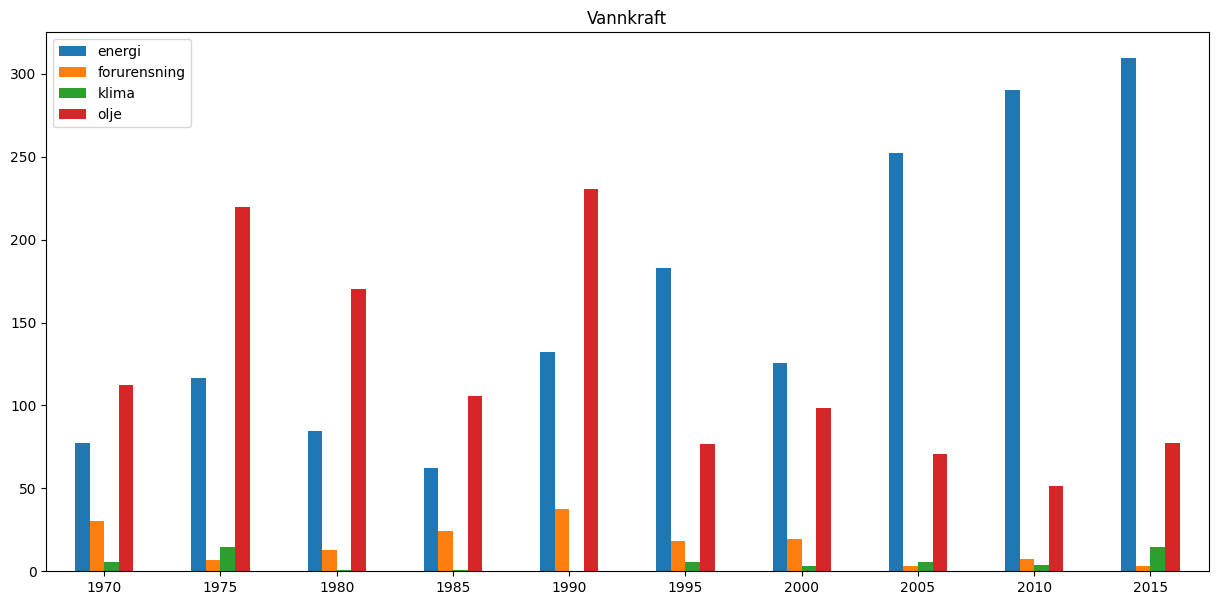

In [24]:
vann.loc[[x for x in " energi forurensning klima olje".split() if x in vann.index]].transpose().plot(kind="bar",figsize=(15,7),title="Vannkraft", rot=0)

In [25]:
a.sort_values(by=a.columns[1], ascending=False).fillna(0).head(20).style.format(precision=0).background_gradient(axis = 1)

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
flernasjonale,0,6571,0,55,49,0,0,0,0,0
Tiberg,0,6253,0,0,0,0,0,0,0,0
prøveboring,654,5255,1246,424,373,49,671,302,109,35
bergverksdrift,121,3050,7052,6233,7831,854,220,19,15,24
oljeleting,8092,2520,1594,968,1473,729,943,502,229,148
breddegrad,1642,2334,728,136,119,38,9,7,11,9
oljeutvinning,621,1871,538,480,362,831,2286,1175,1576,1453
oljeselskaper,104,1788,239,288,285,118,288,28,81,167
Industriproduksjonen,0,1618,356,98,0,0,0,0,0,0
operatør,0,1247,8,191,0,51,27,0,6,72


In [26]:
b.sort_values(by=b.columns[0], ascending=False).fillna(0).head(20).style.format(precision=0).background_gradient(axis = 1)

,1970,1985,2000,2015
oljeeventyret,2204,1180,766,1520
småsparere,601,59,0,86
tørner,569,0,0,0
Kvinnsland,524,276,0,0
oljealderen,503,149,188,251
storbanker,440,0,0,0
Utnyttelsen,398,0,0,0
supermarked,397,0,0,0
BRAVO,376,0,0,0
Titania,368,0,0,0


In [27]:
c = dh.Corpus(doctype="digibok", from_year= 1980, to_year = 1990, limit = 5000)
coll = coll = api.urn_collocation(
            urns = list(c.corpus.urn),
            word="helse",
            before=0, 
            after=10,         
        )

In [28]:
check = lambda w: [x for x in tot.index if x.startswith(w)]

In [29]:
len(check('olje'))

85

In [30]:
len(check('miljø'))

67

In [31]:
len(check('klima'))

23

In [32]:
len(check('helse'))

113

In [33]:
tot.loc[[x for x in tot.index if x.startswith('olje')]]

,freq
olje,3256880
oljen,724680
olje-,534852
oljer,258206
oljeselskapene,227458
oljevirksomheten,180471
oljeindustrien,171547
oljeprisen,171410
oljeselskap,165270
oljeselskapet,125545


In [ ]:
tot.loc[[x for x in tot.index if x.startswith('helse')]]

In [71]:
tot.loc[check("klima")]

,freq
klima,1847418
klimaet,405659
klimaanlegg,180786
klimatiske,165246
klimaks,152859
klimaendringer,114978
klimaendringene,84532
klimagasser,81270
klima-,50790
klimapolitikk,48026


In [73]:
print(', '.join(check('olje')))

olje, oljen, olje-, oljer, oljeselskapene, oljevirksomheten, oljeindustrien, oljeprisen, oljeselskap, oljeselskapet, oljeselskaper, oljevirksomhet, oljepris, oljeboring, oljemalerier, oljet, oljeprisene, oljefondet, oljeinntektene, oljesøl, oljeprodukter, oljebransjen, oljemaling, oljefyring, oljeproduksjon, oljepenger, oljepriser, oljesektoren, oljeproduksjonen, oljeutvinning, olje-og, oljepolitikk, oljeleting, oljeinntekter, oljekamin, oljeskift, oljekrisen, oljefelt, oljetanker, oljegrus, oljeindustri, oljepengene, oljefunn, oljetank, oljefyr, oljefeltene, oljefat, oljeutslipp, oljeeventyret, oljeproduserende, oljebyen, oljeplattformer, oljeselskapenes, oljeraffineri, oljepolitikken, oljefyringsanlegg, oljeforbruk, oljemarkedet, oljealderen, oljens, oljeog, oljevern, oljeutvinningen, oljeforbruket, oljenæringen, oljesølet, oljeaktiviteten, oljeminister, oljearbeidere, oljefyrt, oljemaleri, oljefeltet, oljevernberedskap, oljekilder, oljeplattform, oljevernberedskapen, oljehyre, oljef